In [ ]:
from gensim.models import word2vec
import gensim.downloader as gapi
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

sns.set(rc={'figure.figsize':(11, 4)})
plt.rcParams['figure.figsize']  = (18, 10)
plt.rcParams['axes.labelsize']  = 20
plt.rcParams['axes.titlesize']  = 20
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['lines.linewidth'] = 4
plt.ion()
plt.style.use('seaborn-colorblind')
plt.rcParams['figure.figsize']  = (12, 8) # não sei o motivo, mas o use acima reseta o size.

In [ ]:
!wget http://mattmahoney.net/dc/text8.zip
!unzip text8.zip

--2021-12-03 15:07:30--  http://mattmahoney.net/dc/text8.zip
Resolving mattmahoney.net (mattmahoney.net)... 67.195.197.24
Connecting to mattmahoney.net (mattmahoney.net)|67.195.197.24|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 31344016 (30M) [application/zip]
Saving to: ‘text8.zip’

text8.zip           100%[===================>]  29.89M  2.04MB/s    in 15s     

2021-12-03 15:07:45 (2.02 MB/s) - ‘text8.zip’ saved [31344016/31344016]

Archive:  text8.zip
  inflating: text8                   


In [ ]:
!wget https://raw.githubusercontent.com/nicholas-leonard/word2vec/master/questions-words.txt

--2021-12-03 15:08:30--  https://raw.githubusercontent.com/nicholas-leonard/word2vec/master/questions-words.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 603955 (590K) [text/plain]
Saving to: ‘questions-words.txt’

questions-words.txt 100%[===================>] 589.80K  --.-KB/s    in 0.04s   

2021-12-03 15:08:31 (13.9 MB/s) - ‘questions-words.txt’ saved [603955/603955]



A classe Text8Corpus já lida com o pré-processamento e leitura do corpus para o treinamento dos modelos word2vec, então não tive que programar nada manualmente nessa parte. Entretanto, caso tivesse, como parte do pré-processamento eu realizaria as tarefas de:

1.   Remover pontuação e caracteres especiais.
2.   Lowercasing.
3.   Remoção de stopwords

Por fim, seria interessante avaliar o impacto da lemetização das palavras na acurácia do modelo.



In [ ]:
sentences = word2vec.Text8Corpus('text8')

In [ ]:
nome_colunas = ['capital-common-countries',
 'capital-world',
 'currency',
 'city-in-state',
 'family',
 'gram1-adjective-to-adverb',
 'gram2-opposite',
 'gram3-comparative',
 'gram4-superlative',
 'gram5-present-participle',
 'gram6-nationality-adjective',
 'gram7-past-tense',
 'gram8-plural',
 'gram9-plural-verbs',
 'Total accuracy']

A avaliação de um modelo é medida em várias categorias dadas pelo arquivo "questions.words.txt". Para calcular a acurácia, a quantidade de acertos na categoria é dividida pela quantidade de acertos mais a quantidade de erros. Como resultado da função abaixo, temos um dicionário com uma chave para cada modelo fornecido como entrada. Para cada entrada no dicionário, temos um vetor das acurácias de cada categoria para o modelo em questão.

Além disso, as analogias são feitas utilizando a função "evaluate_word_analogies" da biblioteca gensim, que corresponde ao "compute-accuracy" script da implementação original em C do word2vec.

In [ ]:
def eval_models(models):
    resultados = {}
    for model, model_name in models:
        result = model.wv.evaluate_word_analogies('questions-words.txt')
        acuracias = []
        for entry in result[1]:
            acertos = len(entry['correct'])
            erros = len(entry['incorrect'])
            acuracia = acertos/(acertos+erros)
            acuracias.append(acuracia)
        resultados[model_name] = acuracias
    return resultados

Para evitar de treinar todos os modelos sempre que o notebook for rodado, treinei os modelos em partes e salvei os resultados das avaliações em arquivos .csvs.

In [ ]:
#cbow_100 = word2vec.Word2Vec(sentences, workers=16, min_count=10, size=100)
#cbow_200 = word2vec.Word2Vec(sentences, workers=16, min_count=10, size=200)
#cbow_300 = word2vec.Word2Vec(sentences, workers=16, min_count=10, size=300)

#sg_100 = word2vec.Word2Vec(sentences, workers=16, min_count=10, size=100, sg=1)
#sg_200 = word2vec.Word2Vec(sentences, workers=16, min_count=10, size=200, sg=1)
#sg_300 = word2vec.Word2Vec(sentences, workers=16, min_count=10, size=300, sg=1)

In [ ]:
#cbow_100_w10 = word2vec.Word2Vec(sentences, workers=16, min_count=10, size=100, window=10)
#cbow_200_w10 = word2vec.Word2Vec(sentences, workers=16, min_count=10, size=200, window=10)
#cbow_300_w10 = word2vec.Word2Vec(sentences, workers=16, min_count=10, size=300, window=10)

#sg_100_w10 = word2vec.Word2Vec(sentences, workers=16, min_count=10, size=100, sg=1, window=10)
#sg_200_w10 = word2vec.Word2Vec(sentences, workers=16, min_count=10, size=200, sg=1, window=10)
#sg_300_w10 = word2vec.Word2Vec(sentences, workers=16, min_count=10, size=300, sg=1, window=10)

In [ ]:
#cbow_100_w15 = word2vec.Word2Vec(sentences, workers=16, min_count=10, size=100, window=15)
#cbow_200_w15 = word2vec.Word2Vec(sentences, workers=16, min_count=10, size=200, window=15)
#cbow_300_w15 = word2vec.Word2Vec(sentences, workers=16, min_count=10, size=300, window=15)

#sg_100_w15 = word2vec.Word2Vec(sentences, workers=16, min_count=10, size=100, sg=1, window=15)
#sg_200_w15 = word2vec.Word2Vec(sentences, workers=16, min_count=10, size=200, sg=1, window=15)
#sg_300_w15 = word2vec.Word2Vec(sentences, workers=16, min_count=10, size=300, sg=1, window=15)

In [ ]:
#google_news = gapi.load("word2vec-google-news-300")

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [ ]:
#resultados = eval_models([(cbow_100_w15, 'cbow_100_w15'),
#                          (cbow_200_w15, 'cbow_200_w15'),
#                          (cbow_300_w15, 'cbow_300_w15'),
#                          (sg_100_w15, 'sg_100_w15'),
#                          (sg_200_w15, 'sg_200_w15'),
#                          (sg_300_w15, 'sg_300_w15')])

In [ ]:
#df = pd.DataFrame(resultados, index=nome_colunas)
#df

,cbow_100_w15,cbow_200_w15,cbow_300_w15,sg_100_w15,sg_200_w15,sg_300_w15
capital-common-countries,0.422925,0.515810,0.480237,0.683794,0.707510,0.685771
capital-world,0.227055,0.271655,0.279764,0.417619,0.451161,0.414670
currency,0.106987,0.078603,0.076419,0.159389,0.163755,0.150655
city-in-state,0.153883,0.164078,0.175243,0.199029,0.270874,0.299029
family,0.640351,0.608187,0.657895,0.415205,0.464912,0.447368
gram1-adjective-to-adverb,0.109677,0.115054,0.107527,0.160215,0.147312,0.150538
gram2-opposite,0.124506,0.118577,0.106719,0.116601,0.090909,0.088933
gram3-comparative,0.557808,0.541291,0.535285,0.379129,0.376126,0.358108
gram4-superlative,0.250000,0.281746,0.288360,0.157407,0.145503,0.136243
gram5-present-participle,0.270833,0.300189,0.289773,0.233902,0.203598,0.172348


In [ ]:
from functools import reduce

# Recupera os resultados salvos nos arquivos .csvs em um único dataframe

resultados = [pd.read_csv(f'resultados{i}.csv', index_col=[0]) for i in range(1, 6)]
df = reduce(lambda left, right: pd.merge(left, right, left_index=True, right_index=True), resultados)
df

,cbow_100,cbow_200,sg_100,sg_200,cbow_100_w10,cbow_200_w10,sg_100_w10,sg_200_w10,cbow_300,cbow_300_w10,sg_300,sg_300_w10,google_news,cbow_100_w15,cbow_200_w15,cbow_300_w15,sg_100_w15,sg_200_w15,sg_300_w15
capital-common-countries,0.314229,0.337945,0.553360,0.567194,0.409091,0.470356,0.624506,0.675889,0.353755,0.416996,0.476285,0.652174,0.832016,0.422925,0.515810,0.480237,0.683794,0.707510,0.685771
capital-world,0.142647,0.152967,0.255437,0.266126,0.203833,0.227424,0.350166,0.357906,0.157390,0.206782,0.229266,0.342057,0.813187,0.227055,0.271655,0.279764,0.417619,0.451161,0.414670
currency,0.063319,0.076419,0.152838,0.183406,0.065502,0.098253,0.172489,0.176856,0.100437,0.076419,0.176856,0.168122,0.284653,0.106987,0.078603,0.076419,0.159389,0.163755,0.150655
city-in-state,0.087864,0.109223,0.159223,0.147573,0.121359,0.151456,0.179126,0.237379,0.116019,0.154369,0.143204,0.244660,0.721119,0.153883,0.164078,0.175243,0.199029,0.270874,0.299029
family,0.730994,0.695906,0.561404,0.643275,0.611111,0.602339,0.523392,0.497076,0.725146,0.640351,0.649123,0.517544,0.861660,0.640351,0.608187,0.657895,0.415205,0.464912,0.447368
gram1-adjective-to-adverb,0.106452,0.127957,0.098925,0.084946,0.095699,0.105376,0.161290,0.119355,0.087097,0.095699,0.068817,0.117204,0.292339,0.109677,0.115054,0.107527,0.160215,0.147312,0.150538
gram2-opposite,0.104743,0.102767,0.096838,0.156126,0.094862,0.122530,0.102767,0.140316,0.130435,0.126482,0.140316,0.120553,0.434729,0.124506,0.118577,0.106719,0.116601,0.090909,0.088933
gram3-comparative,0.542793,0.578078,0.524024,0.567568,0.552553,0.570571,0.463213,0.450450,0.593844,0.565315,0.533784,0.449700,0.912913,0.557808,0.541291,0.535285,0.379129,0.376126,0.358108
gram4-superlative,0.255291,0.271164,0.247354,0.277778,0.252646,0.296296,0.195767,0.203704,0.261905,0.276455,0.253968,0.194444,0.879679,0.250000,0.281746,0.288360,0.157407,0.145503,0.136243
gram5-present-participle,0.275568,0.289773,0.285038,0.257576,0.290720,0.314394,0.241477,0.190341,0.284091,0.303030,0.203598,0.157197,0.785038,0.270833,0.300189,0.289773,0.233902,0.203598,0.172348


Como podemos ver, o ganho com o aumento no tamanho dos embeddings das palavras utilizando o modelo de CBOW é mínimo.

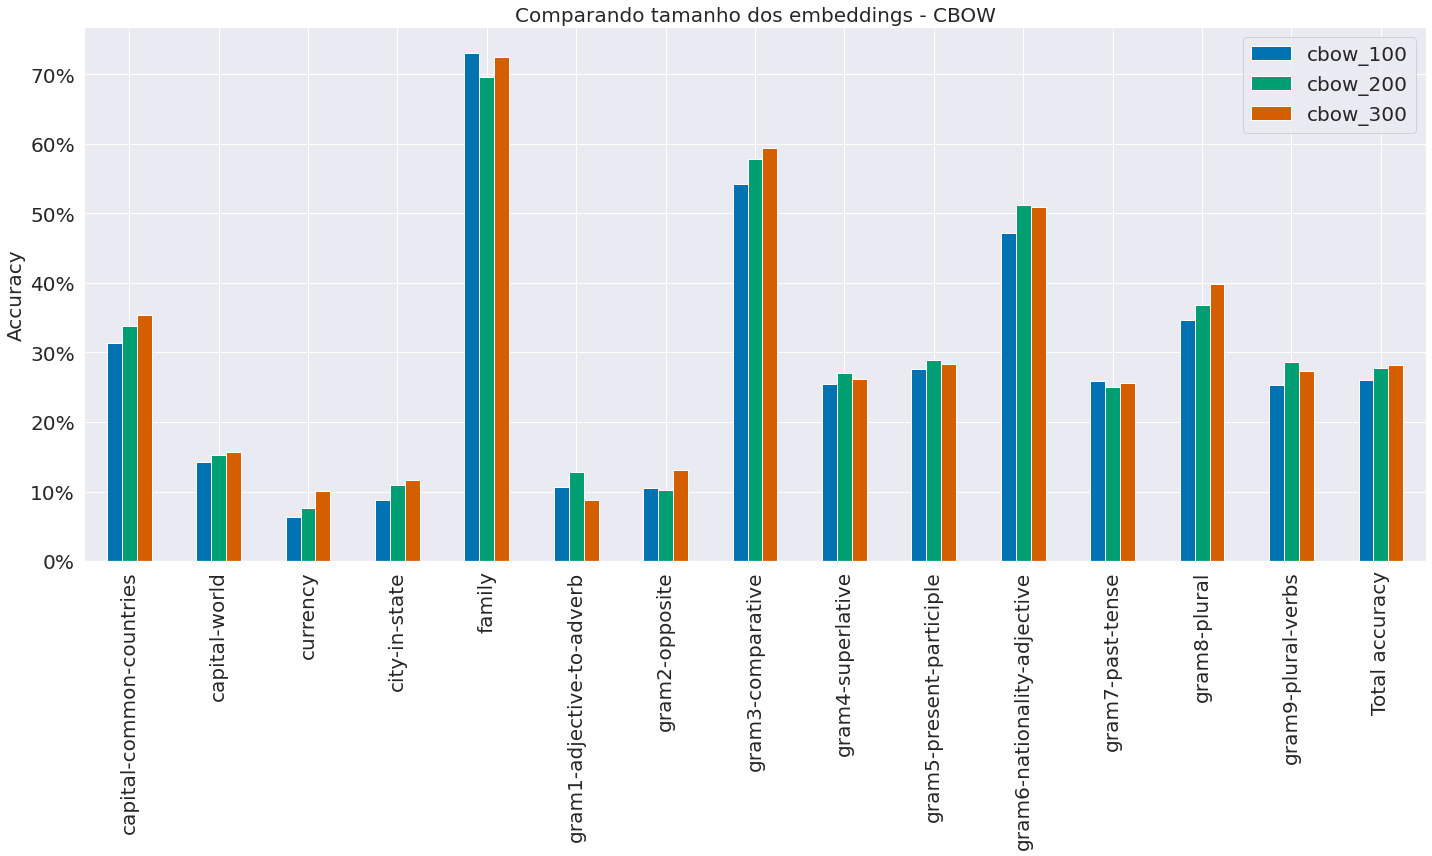

In [ ]:
ax = df[['cbow_100', 'cbow_200', 'cbow_300']].plot.bar(figsize=(20,12))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.ylabel('Accuracy')
plt.title('Comparando tamanho dos embeddings - CBOW')
plt.tight_layout()

Ao aumentar o tamanho do contexto (sliding window) do CBOW, percebemos um aumento mais significativo do que aumentando apenas o tamanho dos embeddings.

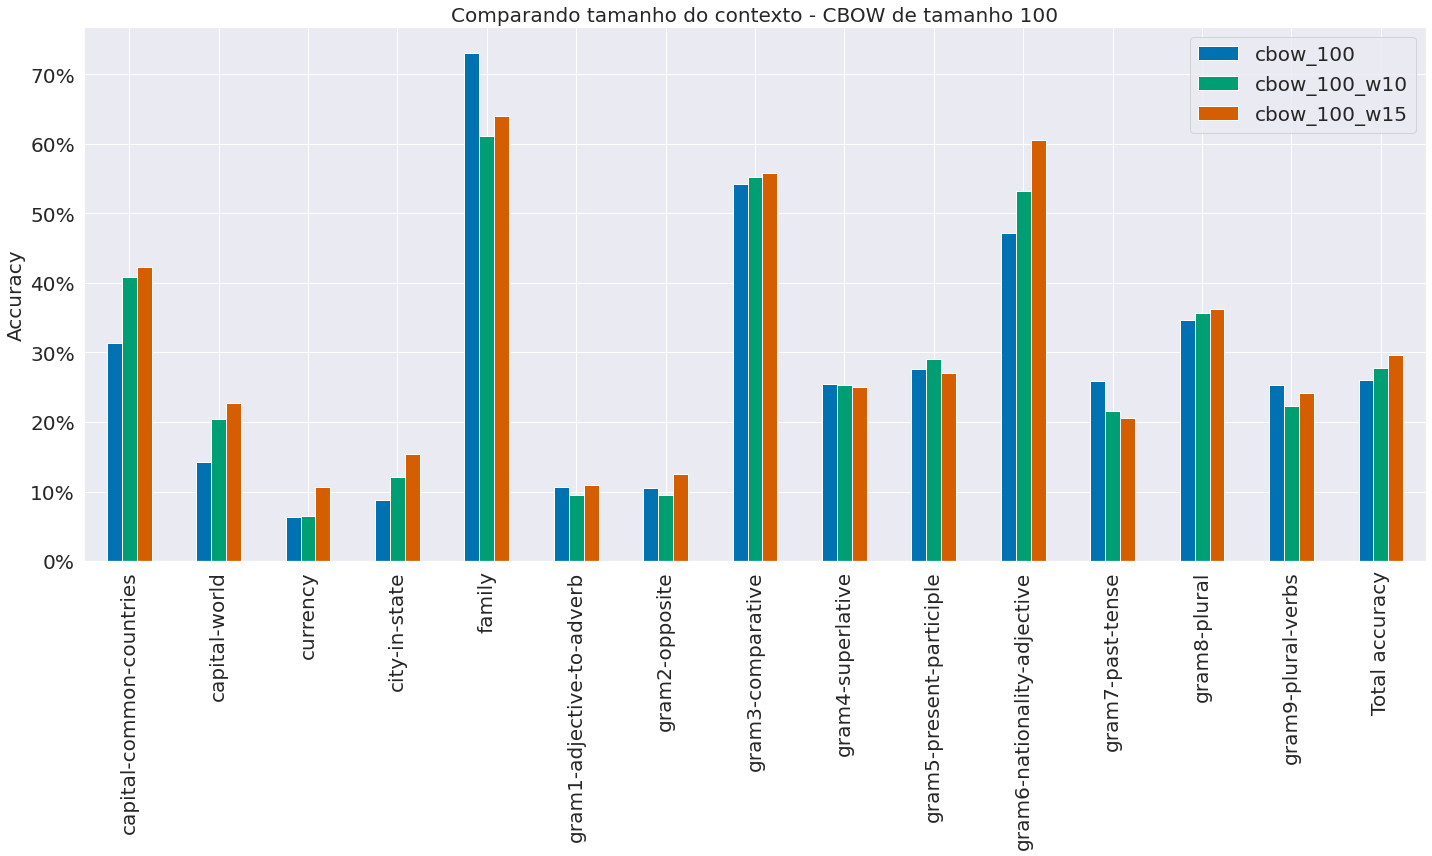

In [ ]:
ax = df[['cbow_100', 'cbow_100_w10', 'cbow_100_w15']].plot.bar(figsize=(20,12))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.ylabel('Accuracy')
plt.title('Comparando tamanho do contexto - CBOW de tamanho 100')
plt.tight_layout()

Com o CBOW com embeddings de tamanho 200, também percebemos um aumento significativo ao aumentar o tamanho do contexto.

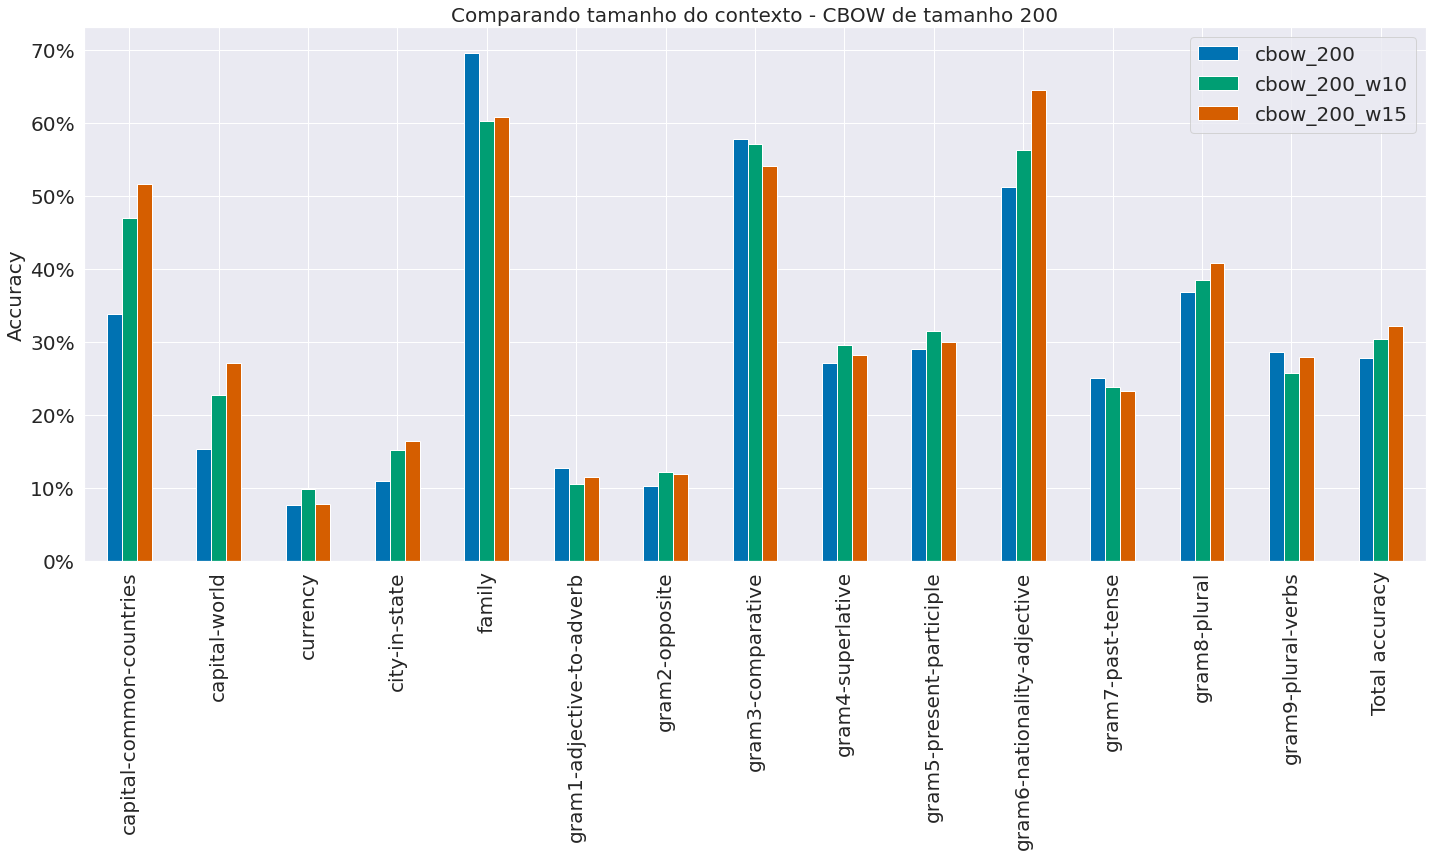

In [ ]:
ax = df[['cbow_200', 'cbow_200_w10', 'cbow_200_w15']].plot.bar(figsize=(20,12))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.ylabel('Accuracy')
plt.title('Comparando tamanho do contexto - CBOW de tamanho 200')
plt.tight_layout()

Com o CBOW de tamanho 300, a situação se repete.

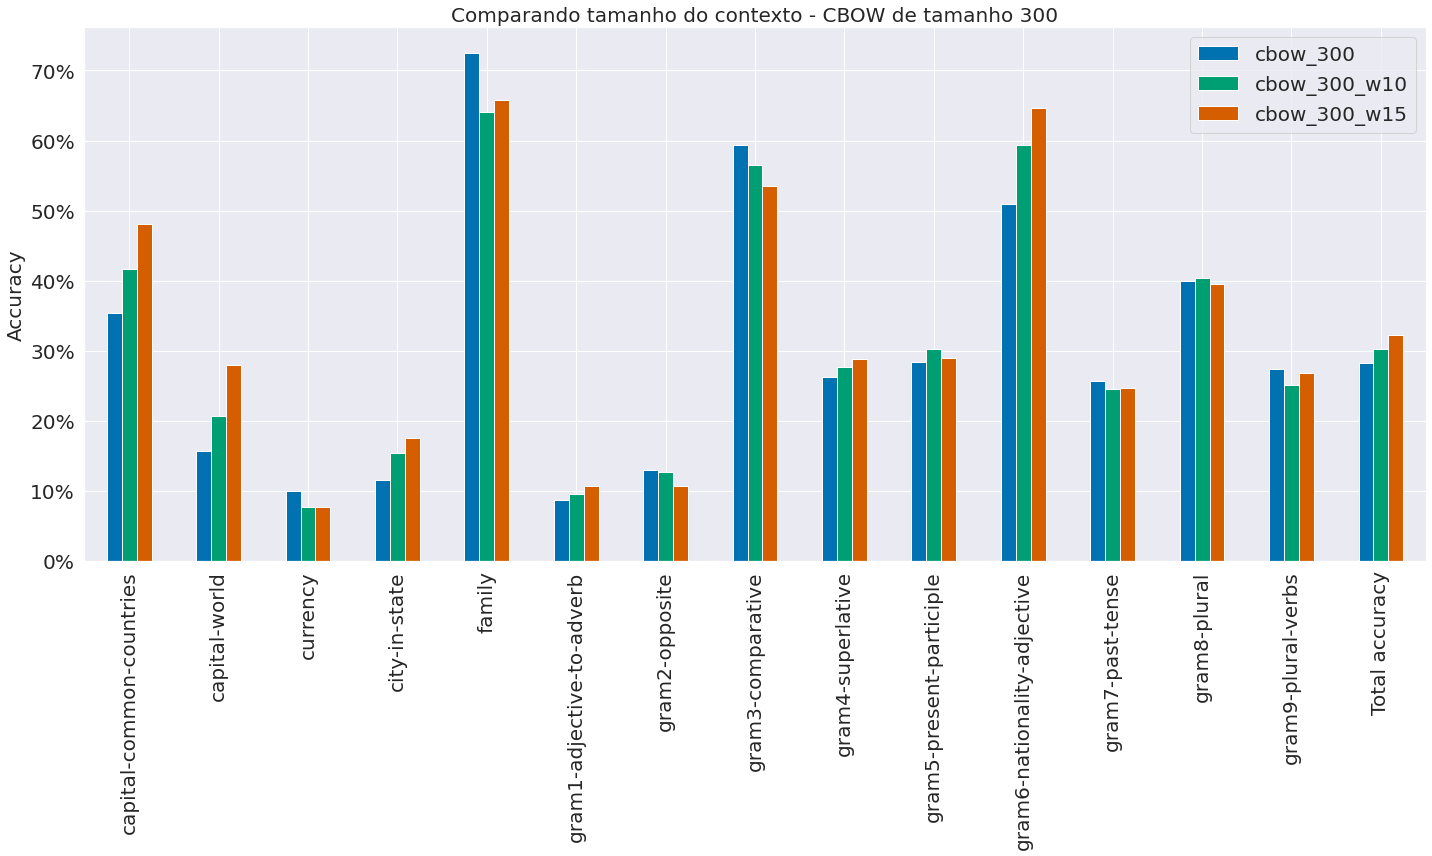

In [ ]:
ax = df[['cbow_300', 'cbow_300_w10', 'cbow_300_w15']].plot.bar(figsize=(20,12))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.ylabel('Accuracy')
plt.title('Comparando tamanho do contexto - CBOW de tamanho 300')
plt.tight_layout()

Entretanto, quando comparamos os tamanhos dos embeddings utilizando o maior contexto, pois apresentou maior aumento na acurácia total, podemos perceber que a acurácia dos modelos de tamanho 200 e 300 é praticamente a mesma, indicando que não há benefício em aumentar a complexidade do modelo deste jeito.

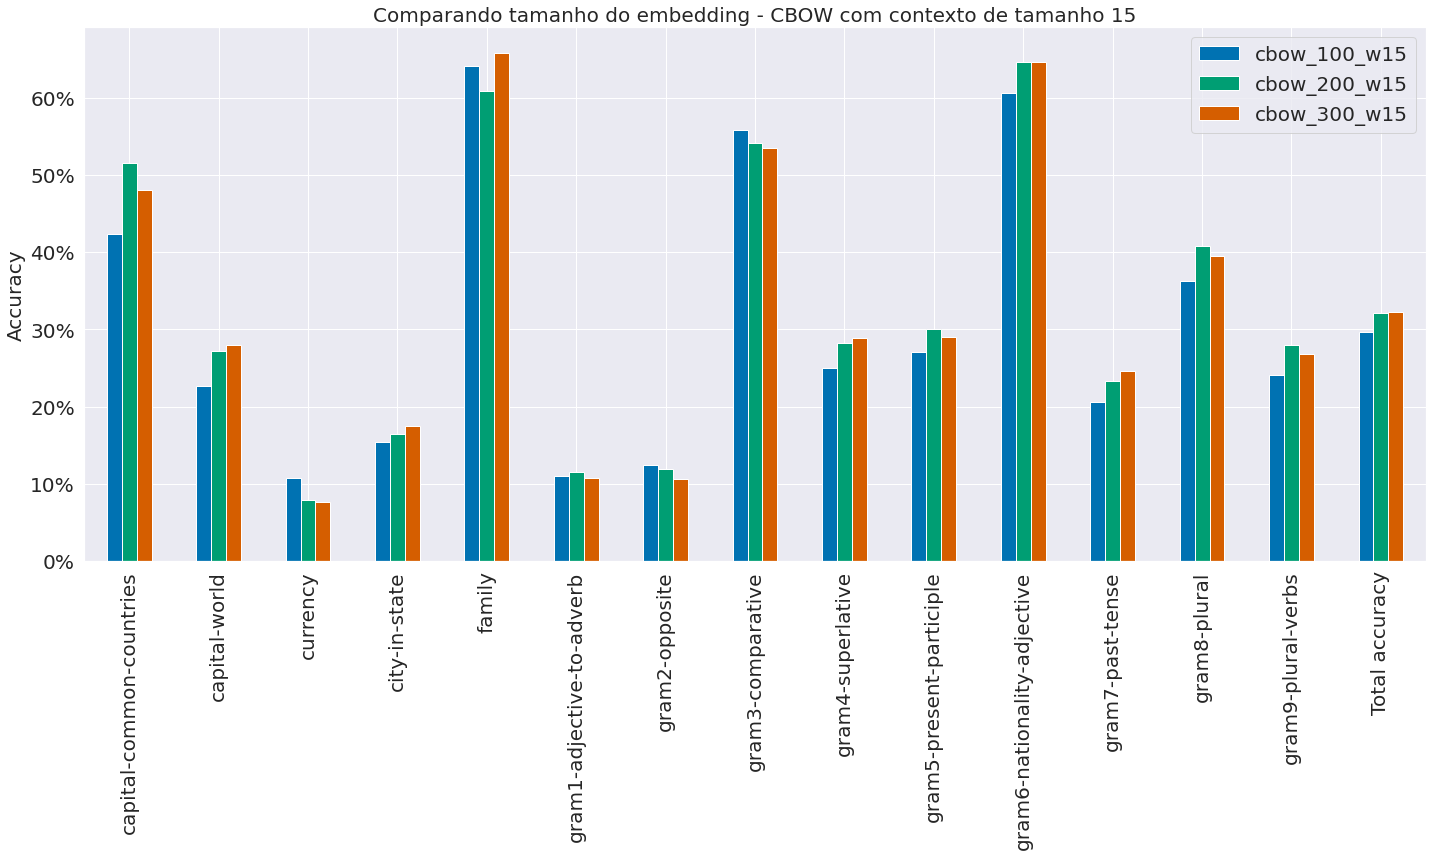

In [ ]:
ax = df[['cbow_100_w15', 'cbow_200_w15', 'cbow_300_w15']].plot.bar(figsize=(20,12))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.ylabel('Accuracy')
plt.title('Comparando tamanho do embedding - CBOW com contexto de tamanho 15')
plt.tight_layout()

Desta vez, para o modelo de Skip-Gram, ao analisar o impacto de apenas aumentar o tamanho do embedding, praticamente não é possível observar diferença na acurácia total.

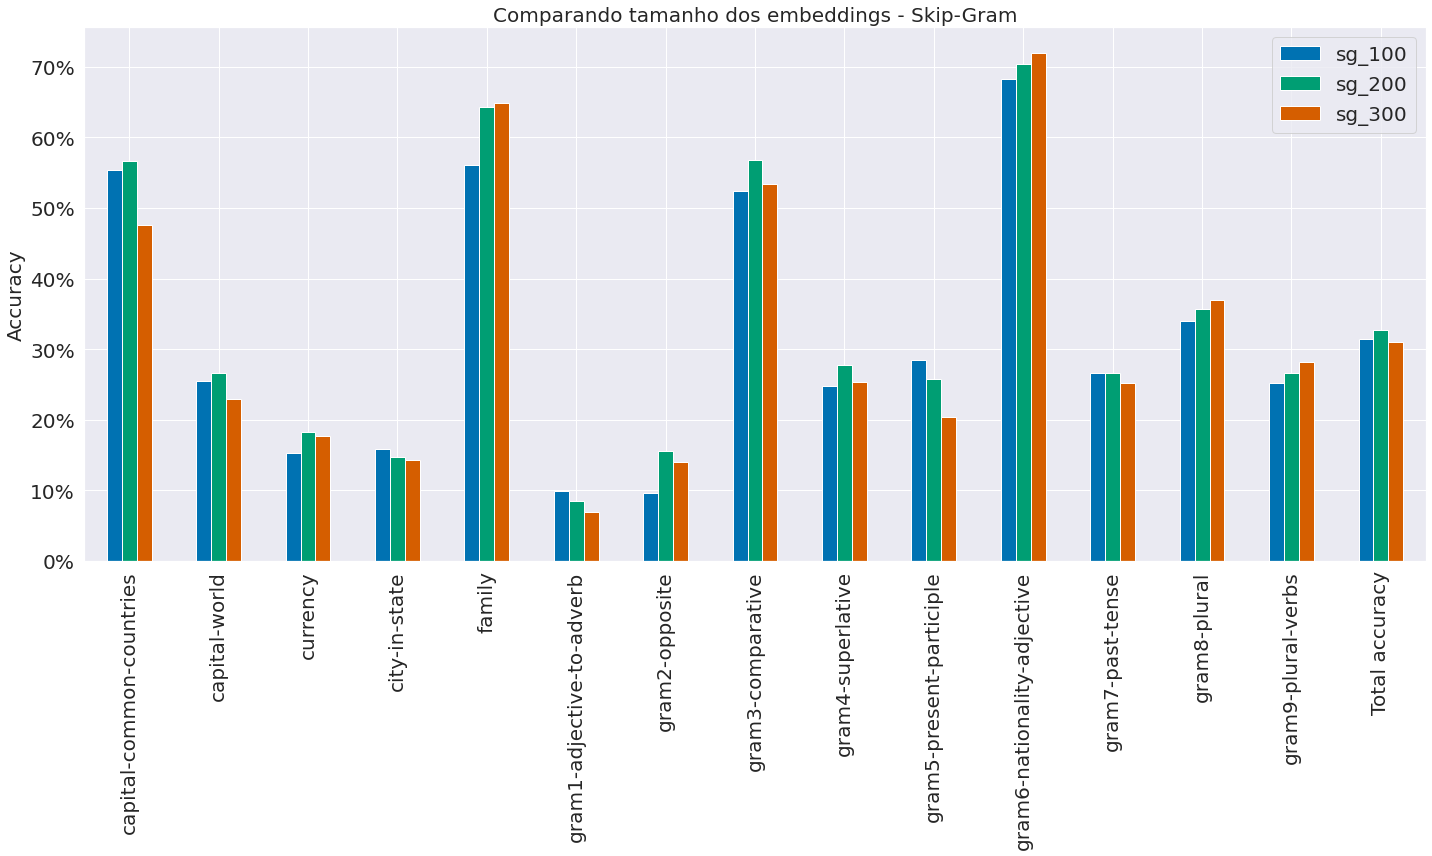

In [ ]:
ax = df[['sg_100', 'sg_200', 'sg_300']].plot.bar(figsize=(20,12))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.ylabel('Accuracy')
plt.title('Comparando tamanho dos embeddings - Skip-Gram')
plt.tight_layout()

Entretanto, ao aumentar o tamanho do contexto para embeddings de tamanho 100, a situação é similar ao modelo de CBOW, onde há um aumento significativo na acurácia total.

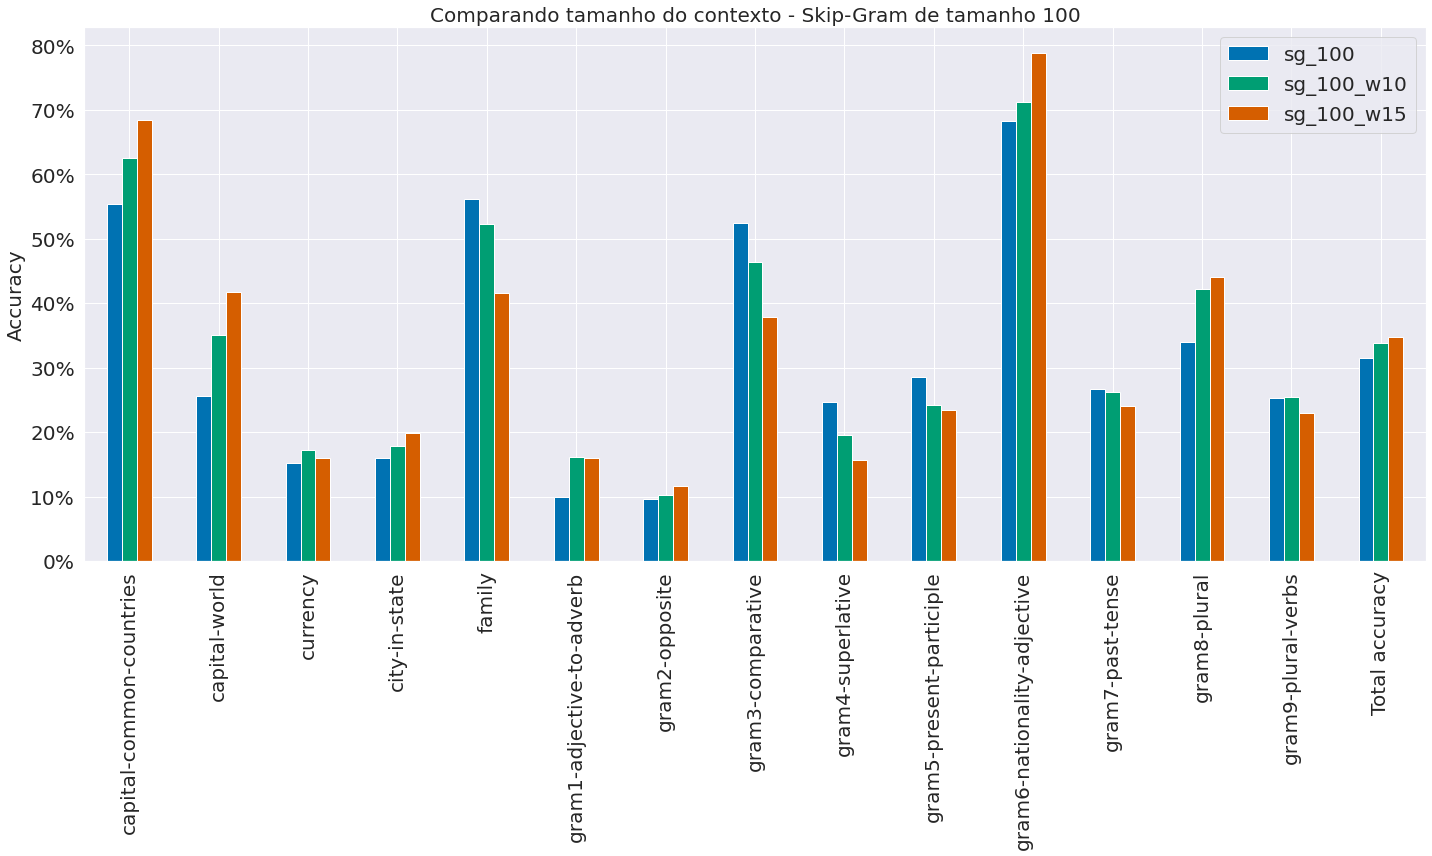

In [ ]:
ax = df[['sg_100', 'sg_100_w10', 'sg_100_w15']].plot.bar(figsize=(20,12))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.ylabel('Accuracy')
plt.title('Comparando tamanho do contexto - Skip-Gram de tamanho 100')
plt.tight_layout()

Para embeddings de tamanho 200, a situação se repete

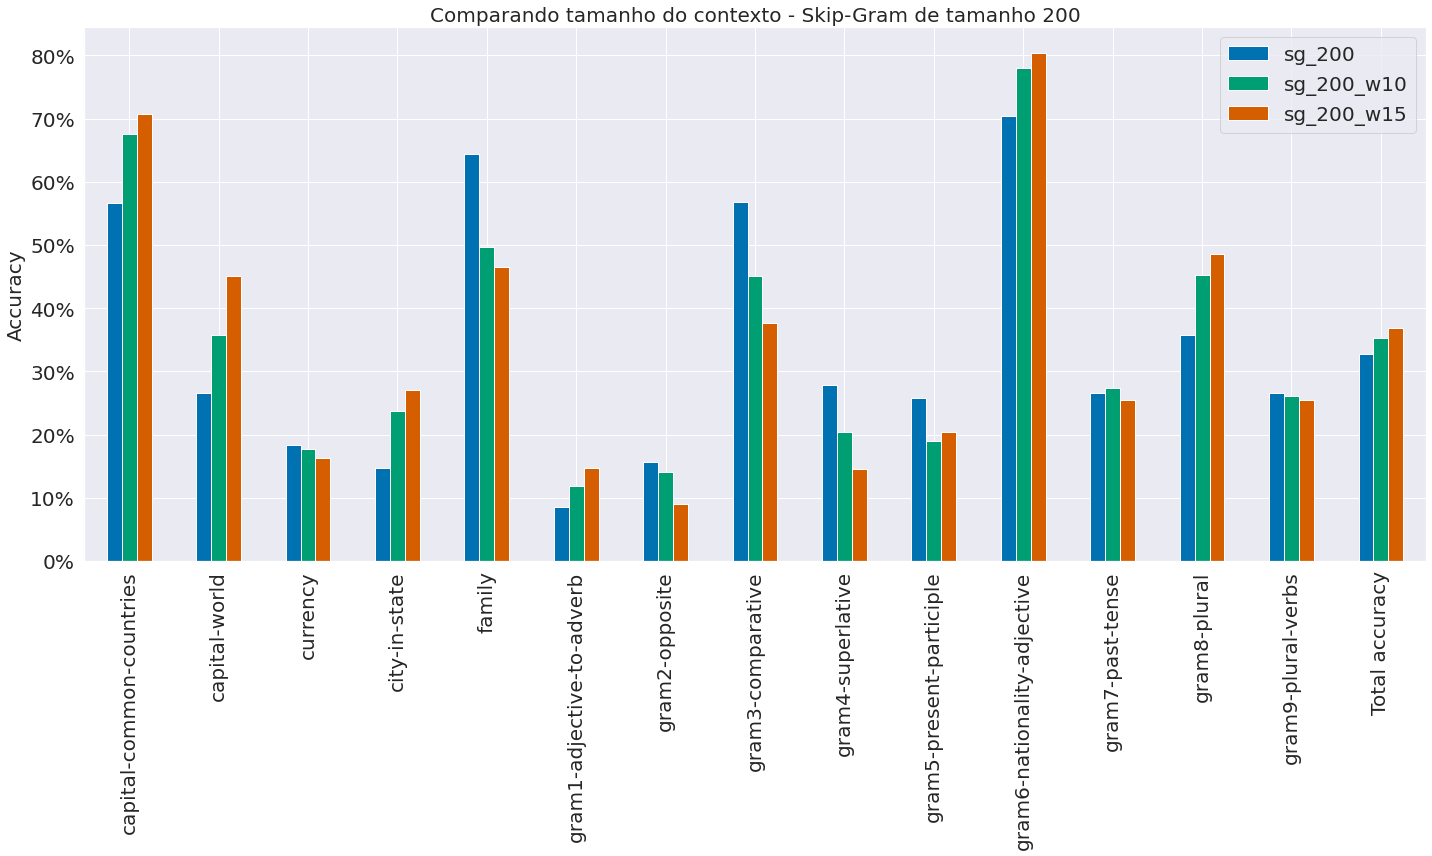

In [ ]:
ax = df[['sg_200', 'sg_200_w10', 'sg_200_w15']].plot.bar(figsize=(20,12))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.ylabel('Accuracy')
plt.title('Comparando tamanho do contexto - Skip-Gram de tamanho 200')
plt.tight_layout()

Para embeddings de tamanho 300, a situação também se repete.

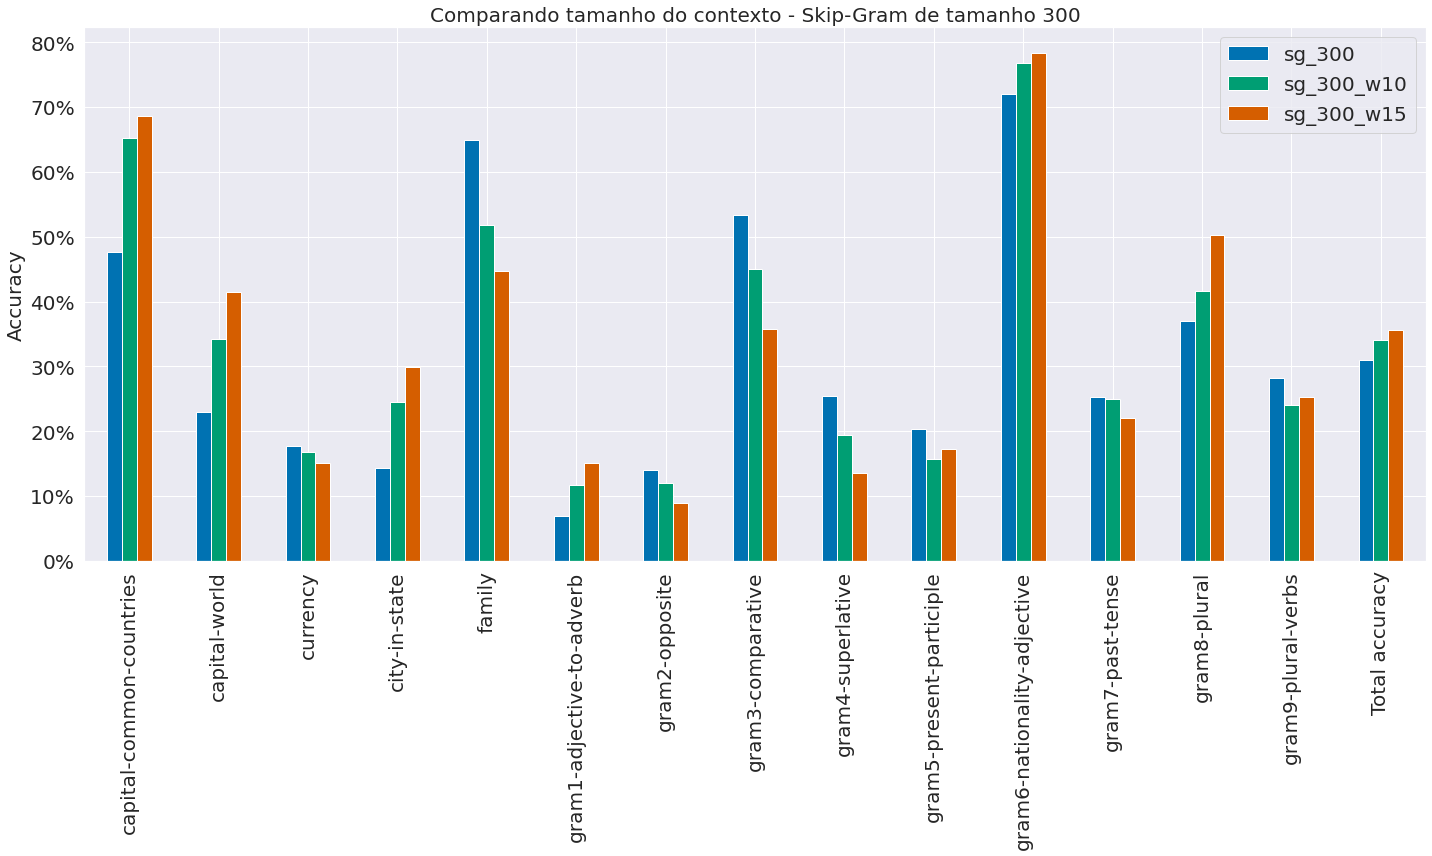

In [ ]:
ax = df[['sg_300', 'sg_300_w10', 'sg_300_w15']].plot.bar(figsize=(20,12))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.ylabel('Accuracy')
plt.title('Comparando tamanho do contexto - Skip-Gram de tamanho 300')
plt.tight_layout()

Entretanto, ao aumentar apenas o tamanho dos embeddings e mantendo o contexto de tamanho 15, o modelo Skip-Gram obteve uma acurácia total muito similar, embora o com tamanho de embedding igual a 200 tenha obtido uma performance levemente superior aos outros.

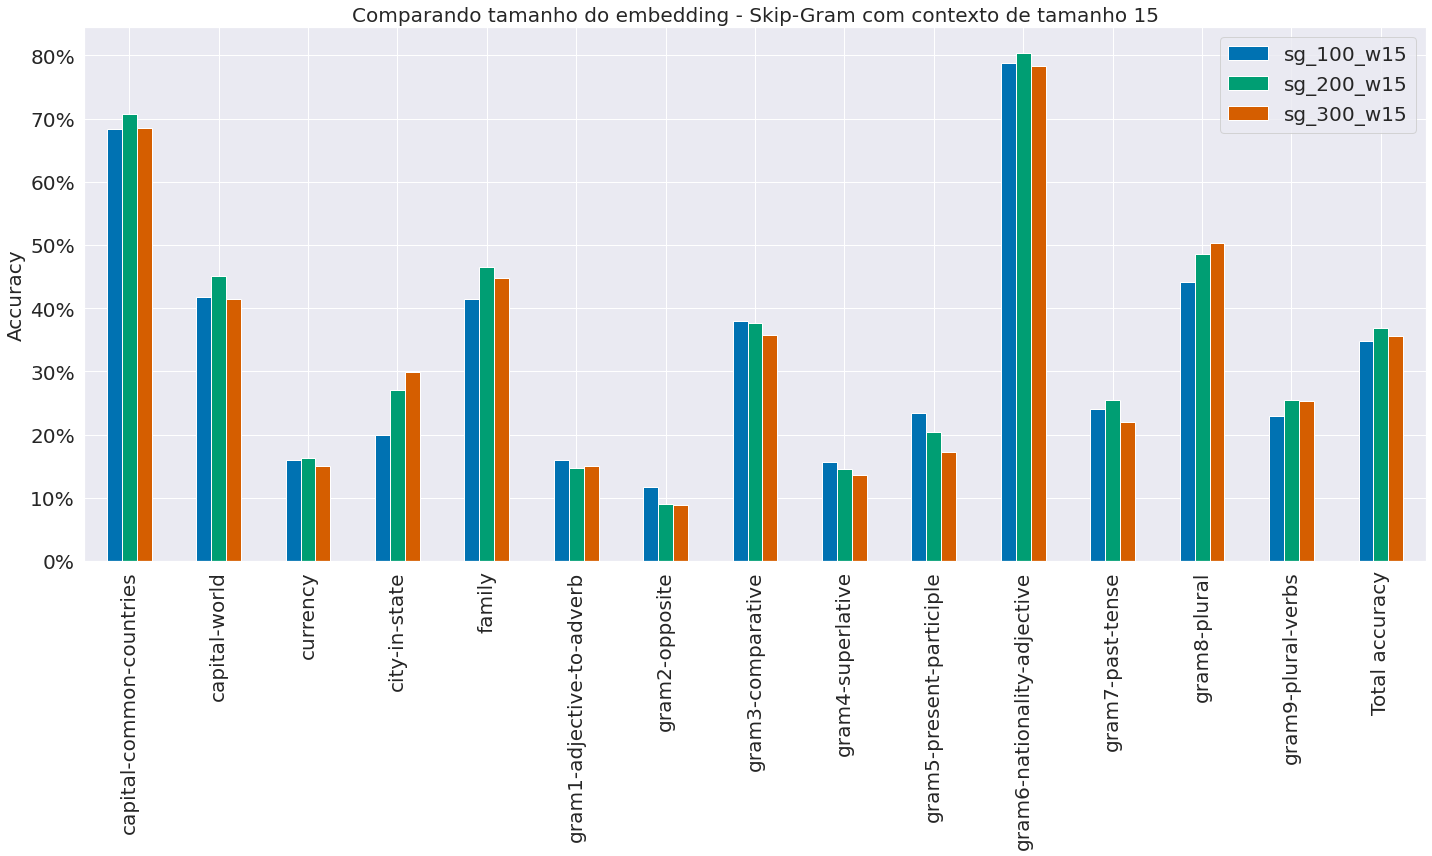

In [ ]:
ax = df[['sg_100_w15', 'sg_200_w15', 'sg_300_w15']].plot.bar(figsize=(20,12))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.ylabel('Accuracy')
plt.title('Comparando tamanho do embedding - Skip-Gram com contexto de tamanho 15')
plt.tight_layout()

Agora, comparando os modelos de CBOW e Skip-Gram com contexto de tamanho igual a 15 e embeddeings variando de 100 a 200, é possível ver resultados interessantes. Em algumas categorias, o CBOW se sai muito melhor do que o Skip-Gram, como por exemplo nas categorias de "family", "gram3-comparative" e "gram4-superlative". Entretanto, para outras categorias a situação é completamente oposta, onde Skip-Gram se sai muito melhor do que o CBOW, como por exemplo nas categorias "capital-common-countries", "capital-world" e "gram6-nationality-adjective". Curiosamente essas categorias são todas relacionaodas com aspectos geográficos.

Entretanto, quando olhamos a acurácia total, podemos ver que no geral os modelos de Skip-Gram se saíram melhores do que os modelos de CBOW. Isso confirma, conforme vimos em aula, que o modelo de Skip-Gram se saí melhor que o CBOW para vocabulários relativamente pequenos, que é o caso do text8.

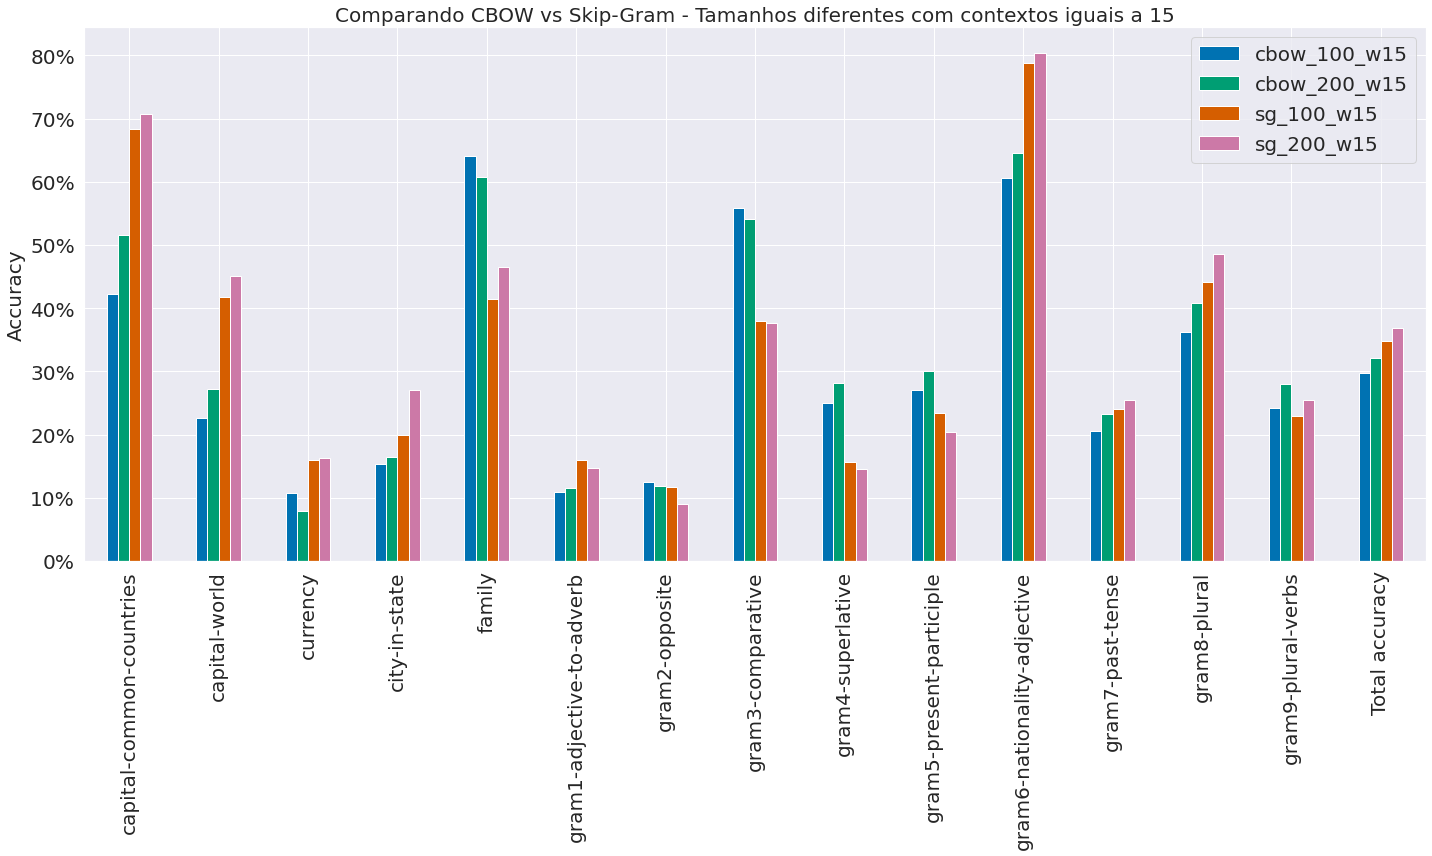

In [ ]:
ax = df[['cbow_100_w15', 'cbow_200_w15', 'sg_100_w15', 'sg_200_w15']].plot.bar(figsize=(20,12))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.ylabel('Accuracy')
plt.title('Comparando CBOW vs Skip-Gram - Tamanhos diferentes com contextos iguais a 15')
plt.tight_layout()

Particularmente achei o resultado de mais ou menos 35% de acurácia total um pouco decepcionante. Por curiosidade, resolvi comparar esse resultado com um modelo pré-treinado disponibilizado pela biblioteca gensim. Esse modelo foi treinado utilizando um dataset do Google News com aproximadamente 100 bilhões de palavras e possui embeddings de tamanho 300. O resultado é a diferença gigante causada pelo treinamento com um corpus muito maior. Abaixo, vemos o gráfico com a diferença de performance entre os melhores modelos de CBOW e Skip-Gram treinados neste trabalho e o modelo treinado utilizando o dataset do Google News

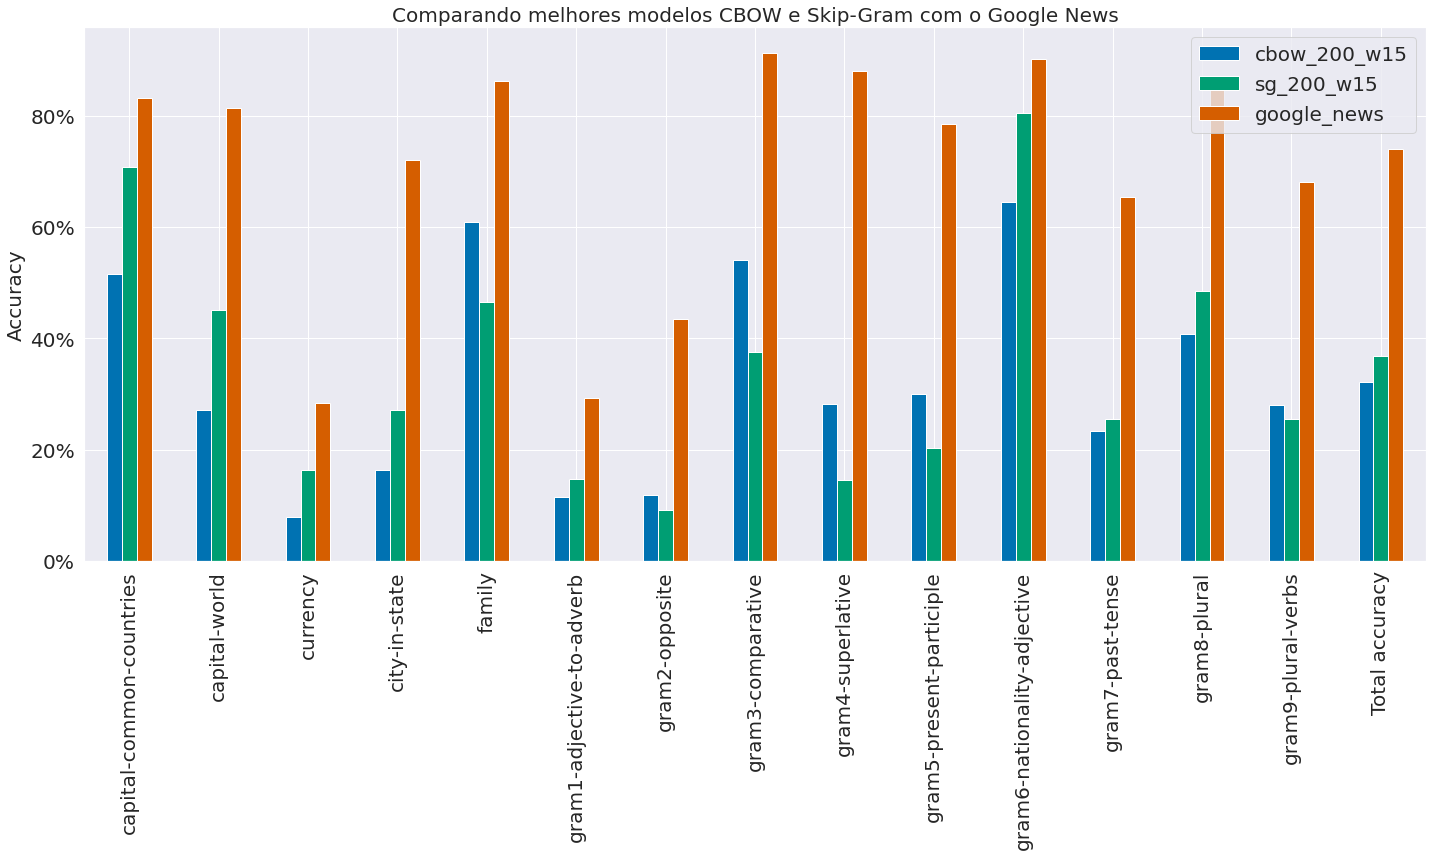

In [ ]:
ax = df[['cbow_200_w15', 'sg_200_w15', 'google_news']].plot.bar(figsize=(20,12))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.ylabel('Accuracy')
plt.title('Comparando melhores modelos CBOW e Skip-Gram com o Google News')
plt.tight_layout()